In [140]:
import pandas as pd

df = pd.read_csv('C:/Users/GUJAN MISHRA/Downloads/sales_data.csv')
df = df.dropna(subset=['Units Sold', 'Price Per Unit', 'Total Revenue'])
df = df[df['Units Sold'] >= 0]
df = df[df['Price Per Unit'] > 0]
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df.head()

,Date,Region,Product,Units Sold,Price Per Unit,Total Revenue
0,2025-01-23,East,Product B,83,216.10,17936.30
1,2025-02-16,South,Product A,137,41.27,5653.99
2,2025-03-12,North,Product E,78,472.68,36869.04
3,2025-04-23,South,Product D,31,437.05,13548.55
4,2025-04-28,South,Product D,120,75.46,9055.20


In [142]:
import numpy as np

mean_units_sold = np.mean(df['Units Sold'])
median_units_sold = np.median(df['Units Sold'])
std_units_sold = np.std(df['Units Sold'])

print(mean_units_sold, median_units_sold, std_units_sold)

100.4382 102.0 58.03803046933977


In [144]:
mean_revenue = np.mean(df['Total Revenue'])
median_revenue = np.median(df['Total Revenue'])
std_revenue = np.std(df['Total Revenue'])

print(mean_revenue, median_revenue, std_revenue)

25128.337646 19205.25 21672.830871280414


In [146]:
region_product_revenue = df.groupby(['Region', 'Product']).agg({'Total Revenue': ['sum', 'mean']}).reset_index()
print(region_product_revenue.head())


  Region    Product Total Revenue              
                              sum          mean
0   East  Product A    5618108.66  24858.887876
1   East  Product B    6098848.84  25411.870167
2   East  Product C    6819034.99  23595.276782
3   East  Product D    6623794.90  24352.187132
4   East  Product E    5511510.84  26625.656232


In [148]:
top_3_products = df.groupby('Product')['Total Revenue'].sum().sort_values(ascending=False).head(3)
print(top_3_products)


Product
Product D    26536495.39
Product C    25677850.40
Product E    25205214.74
Name: Total Revenue, dtype: float64


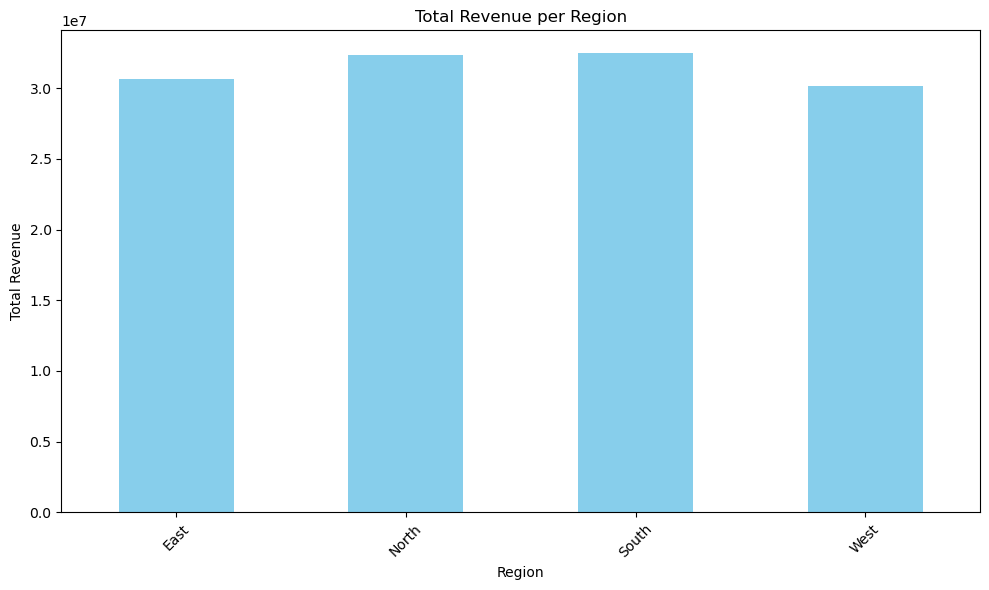

In [150]:
import matplotlib.pyplot as plt

region_revenue = df.groupby('Region')['Total Revenue'].sum()
plt.figure(figsize=(10, 6))
region_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue per Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

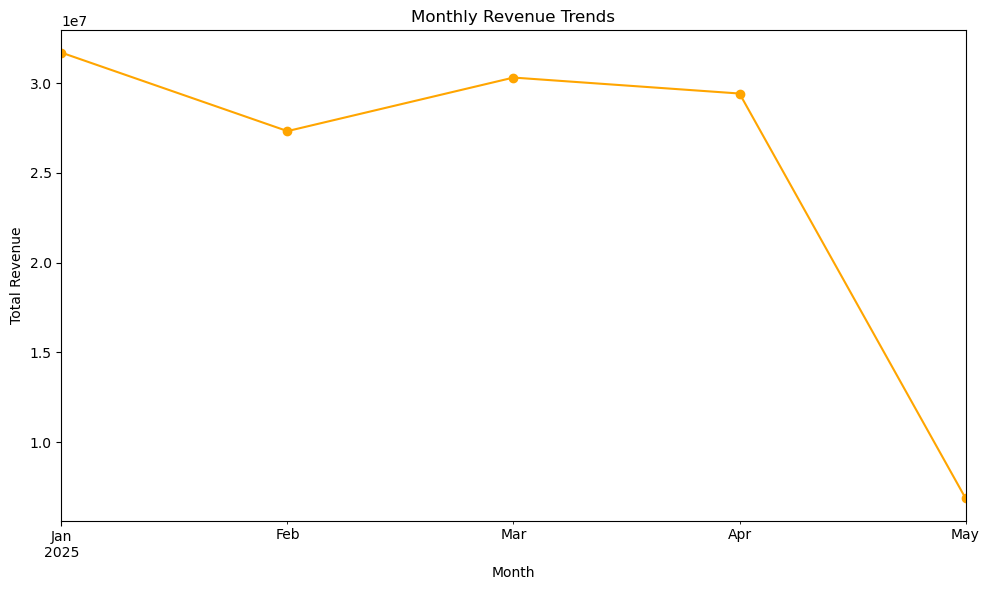

In [152]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Total Revenue'].sum()

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', color='orange')
plt.title('Monthly Revenue Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

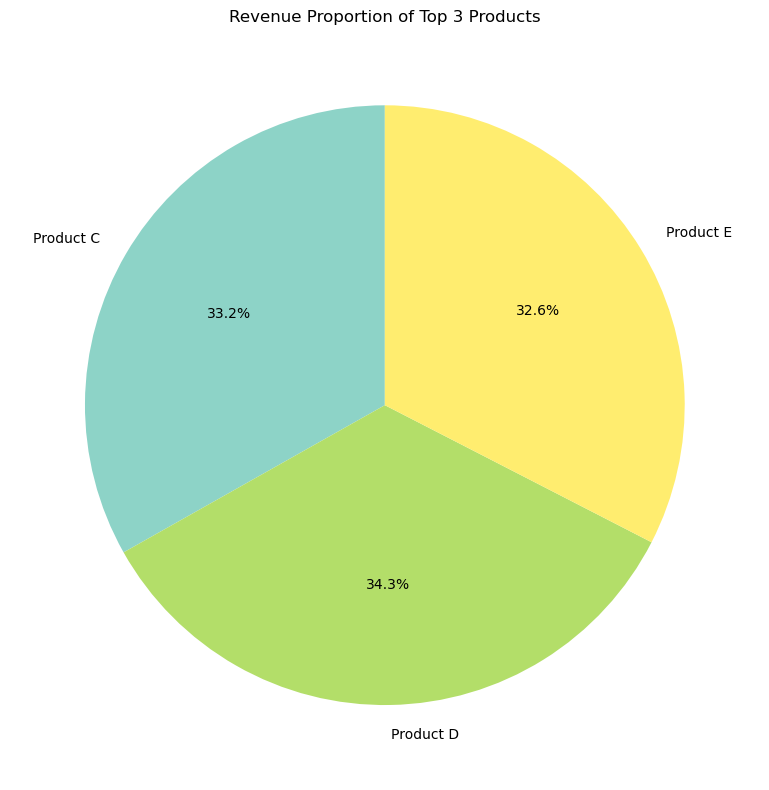

In [154]:
top_3_products_revenue = df[df['Product'].isin(top_3_products.index)].groupby('Product')['Total Revenue'].sum()

plt.figure(figsize=(8, 8))
top_3_products_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Revenue Proportion of Top 3 Products')
plt.ylabel('')
plt.tight_layout()
plt.show()

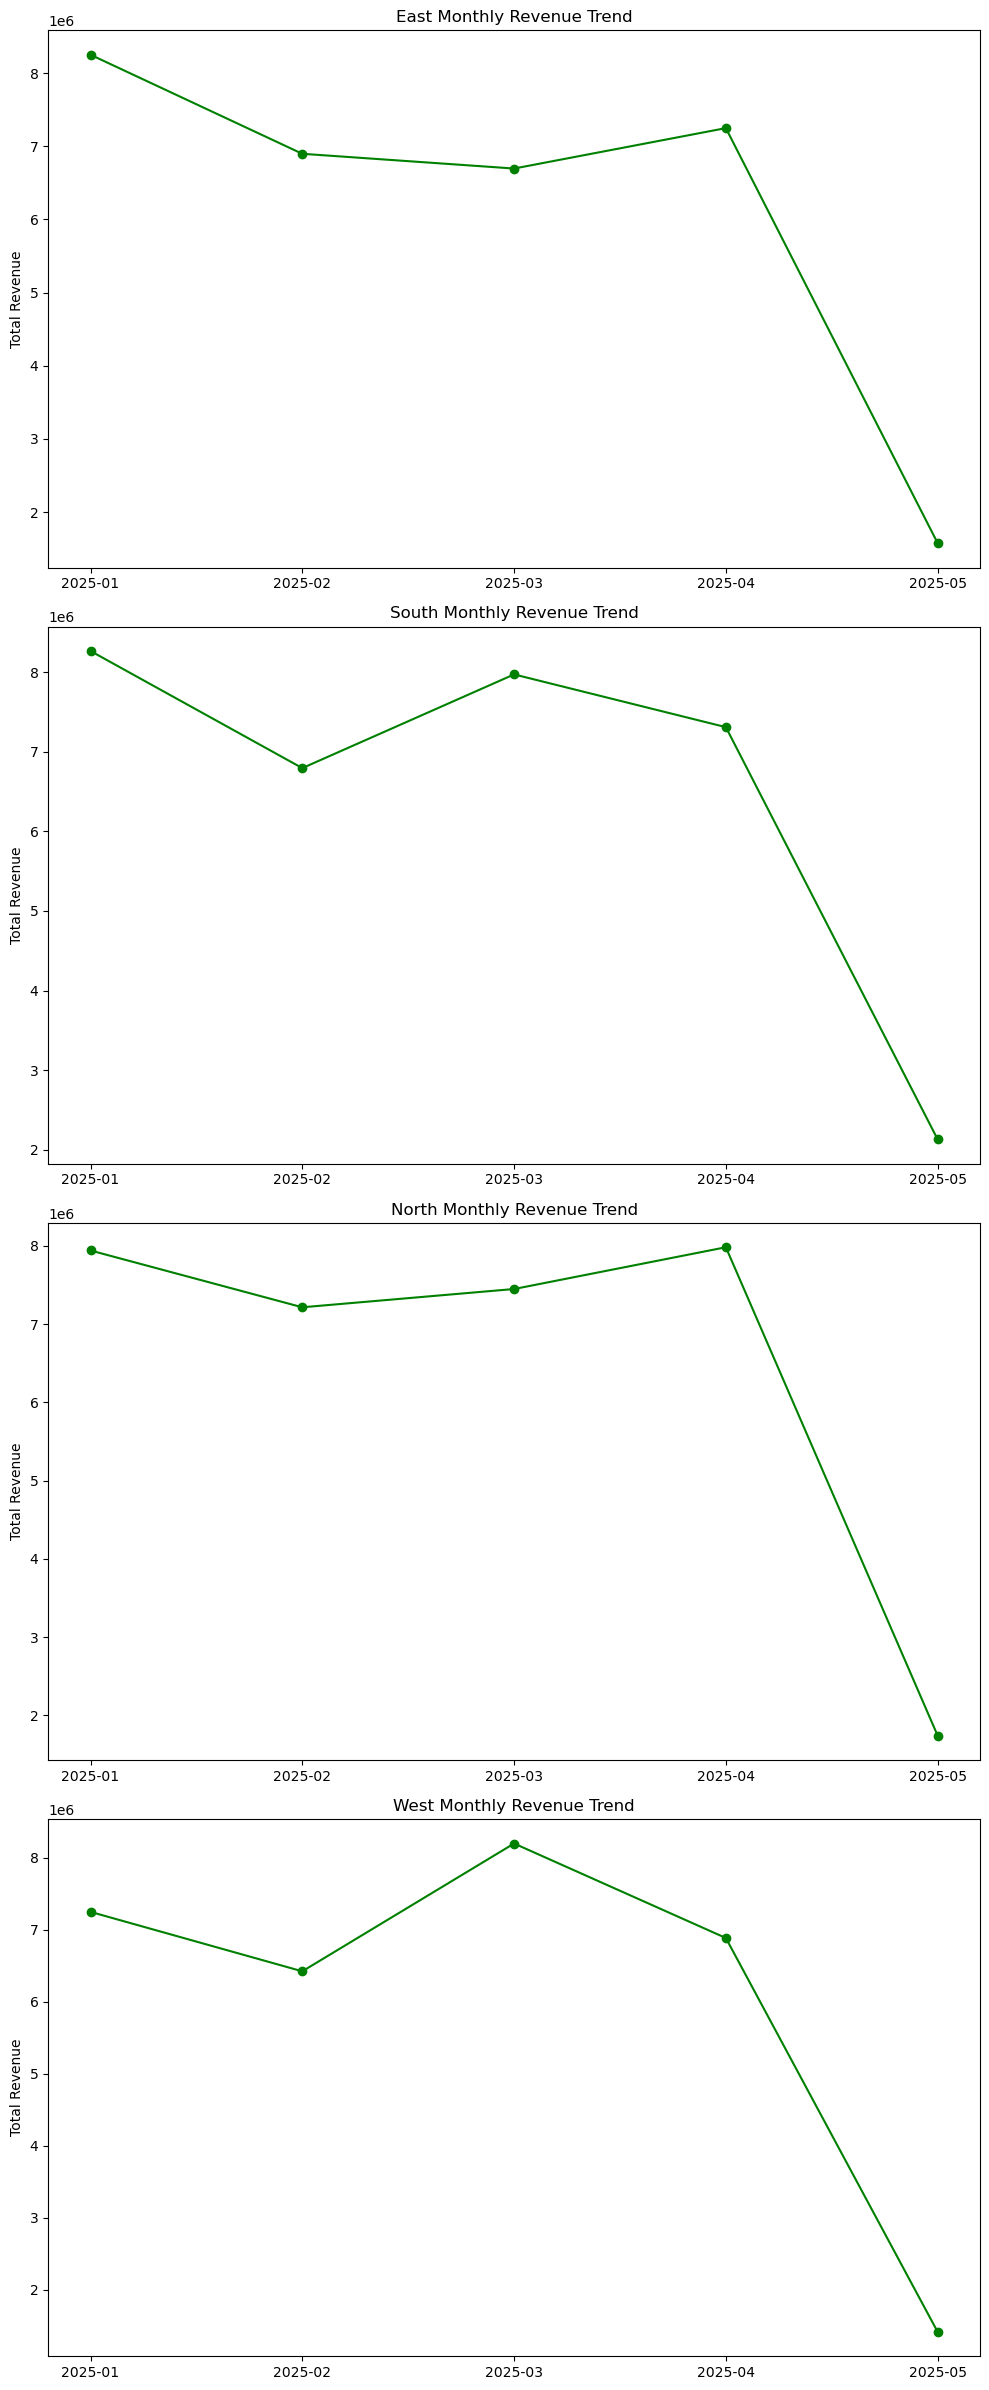

In [156]:
regions = df['Region'].unique()
fig, axs = plt.subplots(len(regions), 1, figsize=(10, 6 * len(regions)))

for i, region in enumerate(regions):
    region_data = df[df['Region'] == region].groupby('Month')['Total Revenue'].sum()
    axs[i].plot(region_data.index.astype(str), region_data.values, marker='o', color='green')
    axs[i].set_title(f'{region} Monthly Revenue Trend')
    axs[i].set_ylabel('Total Revenue')

plt.tight_layout()
plt.show()

In [165]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M')).agg({'Units Sold': 'sum', 'Total Revenue': 'sum'})
last_month_revenue = monthly_sales['Total Revenue'].iloc[-1]
average_growth_rate = monthly_sales['Total Revenue'].pct_change().mean()
future_sales = last_month_revenue * (1 + average_growth_rate)
print(monthly_sales.head())

         Units Sold  Total Revenue
Date                              
2025-01      127003    31705718.58
2025-02      110905    27330405.36
2025-03      121118    30314936.86
2025-04      116364    29425136.44
2025-05       26801     6865490.99


In [167]:
future_sales = last_month_revenue * (1 + average_growth_rate)
print(future_sales)

5449780.415944549


In [169]:
region_growth = df.groupby('Region').agg({'Total Revenue': 'sum'})
region_growth['Predicted Revenue Next Quarter'] = region_growth['Total Revenue'] * (1 + average_growth_rate)
predicted_region = region_growth['Predicted Revenue Next Quarter'].idxmax()
print(predicted_region)

South
